In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
class LinearRegression():
    def ___init__(self):
        self.w = None
    
    def fit(self, x, Y):
        one_col = np.ones((x.shape[0],1))
        X = np.column_stack((one_col,x))
        
        self.w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

    def predict(self, x):
        return np.sum(np.dot(x, self.w[1:]) + self.w[0])

# Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset:
<br>https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv.
<br> Vẽ model dự đoán (đường thẳng) và dữ liệu (point - scatter). 
<br> Dự đoán giá các căn nhà có diện tích 50, 100, 150. 

In [107]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv')
data

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


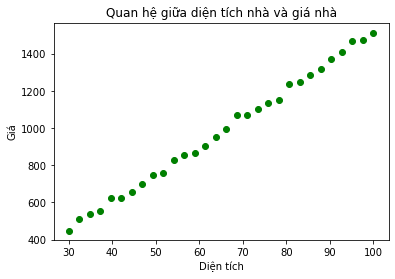

In [108]:
x = np.array(data['Diện tích'])
Y = np.array(data['Giá'])
plt.plot(x, Y,'go')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.title('Quan hệ giữa diện tích nhà và giá nhà')
plt.show()

In [109]:
linear_model_1 = LinearRegression()
linear_model_1.fit(x, Y)

In [110]:
w = linear_model_1.w
w

array([-7.06426865, 15.2110908 ])

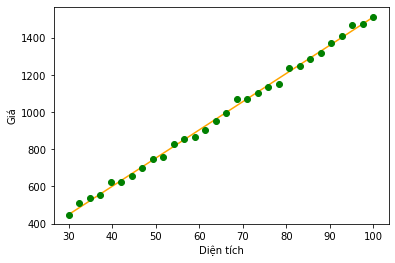

In [111]:
w_0 = w[0]
w_1 = w[1]
x_line = [30,100]
y_line = [w_0 + w_1 * i for i in x_line]
plt.plot(x_line,y_line,'orange')
plt.plot(x, Y,'go')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

In [112]:
for i in [50, 100, 150]:
    print("Prediction for house with price {} is {}".format(i,linear_model_1.predict(i)))

Prediction for house with price 50 is 753.4902713382783
Prediction for house with price 100 is 1514.0448113217976
Prediction for house with price 150 is 2274.599351305317


 ## Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset: <br> https://www.kaggle.com/prasadperera/the-boston-housing-dataset

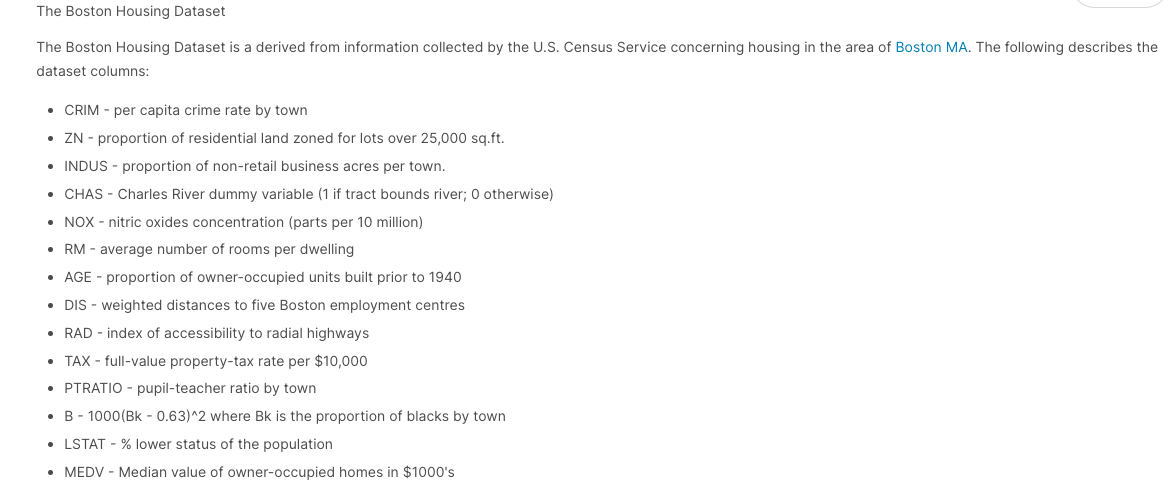

In [113]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [114]:
housing_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

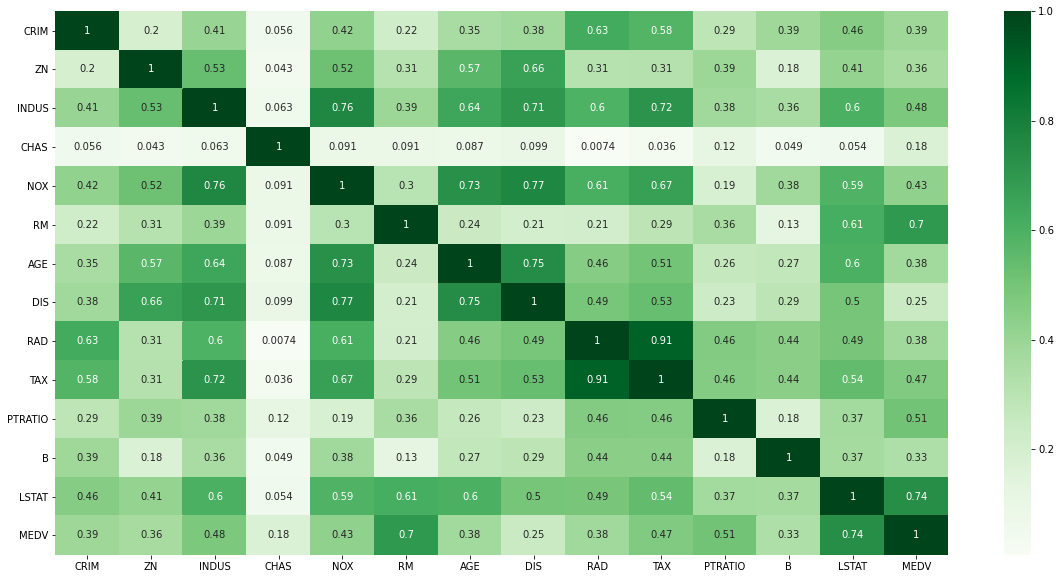

In [115]:
plt.figure(figsize=(20, 10))
sns.heatmap(housing_data.corr().abs(),  annot=True, cmap = 'Greens')

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

In [116]:
x = np.array(housing_data[['LSTAT', 'INDUS', 'RM', 'TAX', 'NOX','PTRATIO']])

In [117]:
x

array([[  4.98 ,   2.31 ,   6.575, 296.   ,   0.538,  15.3  ],
       [  9.14 ,   7.07 ,   6.421, 242.   ,   0.469,  17.8  ],
       [  4.03 ,   7.07 ,   7.185, 242.   ,   0.469,  17.8  ],
       ...,
       [  5.64 ,  11.93 ,   6.976, 273.   ,   0.573,  21.   ],
       [  6.48 ,  11.93 ,   6.794, 273.   ,   0.573,  21.   ],
       [  7.88 ,  11.93 ,   6.03 , 273.   ,   0.573,  21.   ]])

In [118]:
Y = np.array(housing_data['MEDV'])

In [119]:
linear_model_2 = LinearRegression()
linear_model_2.fit(x, Y)

In [120]:
linear_model_2.w

array([ 1.91458185e+01, -5.45934588e-01,  8.71873392e-02,  4.65592779e+00,
       -2.90110504e-03, -3.40311735e+00, -9.13819473e-01])